### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [3]:
# ! pip  install nibabel
!python 1_build_adj_matrix.py ../data/simplePhantoms/fanning_2d_5bundles/wm_vf.nii.gz ../data/simplePhantoms/fanning_2d_5bundles/fods.nii.gz --threshold 0.02 graph

^C


### Afficher le graphe: 

In [9]:
import sys

sys.path.append(r"C:\Users\harsh\quactography")

from IPython.display import Image, display  # type: ignore
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))




Traceback (most recent call last):
  File "c:\Users\harsh\quactography\scripts\2_draw_adj_matrix.py", line 54, in <module>
    main()
  File "c:\Users\harsh\quactography\scripts\2_draw_adj_matrix.py", line 26, in main
    weighted_graph, node_indices, vol_dim = load_graph(args.in_graph)
                                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\harsh\quactography\quactography\adj_matrix\io.py", line 12, in load_graph
    npzfile = np.load(in_file)
              ^^^^^^^^^^^^^^^^
  File "c:\Users\harsh\.virtualenv\stageT2\Lib\site-packages\numpy\lib\npyio.py", line 427, in load
    fid = stack.enter_context(open(os_fspath(file), "rb"))
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'graph.npz'


FileNotFoundError: [Errno 2] No such file or directory: 'graph_adj_mat.png'

### Créer une matrice d'adjacence aléatoire:

In [ ]:
!python 1_build_random_adj_matrix.py 7 7  False rand_graph

4
7


In [23]:
!python 2_draw_random_adj_matrix.py 13_edges_rand_graph 13_rand_graph_visu
display(Image(filename='5_rand_graph_visu.png'))

FileNotFoundError: [Errno 2] No such file or directory: '5_rand_graph_visu.png'

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [6]:
!python 3_find_max_intensity_diffusion_path.py 13_edges_rand_graph 0 7 qaoa_solver_infos edge --alphas  2   --reps 2  -npr 5 --refinement_loops 5 --epsilon 1e-6

SparsePauliOp(['IIIIIIIIIIIII', 'IIIIIIIIIIIIZ', 'IIIIIIIIIIIZI', 'IIIIIIIIIIZII', 'IIIIIIIIIZIII', 'IIIIIIIIZIIII', 'IIIIIIIZIIIII', 'IIIIIIZIIIIII', 'IIIIIZIIIIIII', 'IIIIZIIIIIIII', 'IIIZIIIIIIIII', 'IIZIIIIIIIIII', 'IZIIIIIIIIIII', 'ZIIIIIIIIIIII', 'IIIIIIIIIIIZZ', 'IIIIIIIIIIZIZ', 'IIIIIIIIIIZZI', 'IZIZIIIIIIIII', 'ZIIZIIIIIIIII', 'ZZIIIIIIIIIII', 'IIIIIIIIZZIIZ', 'IIIIIIZZIZIZI', 'IIIIIZIZIIZII', 'IIIZZIIIZIIII', 'IZZIZIZIIIIII', 'ZIZIIZIIIIIII'],
              coeffs=[33.5+0.j, -3.5+0.j, -3.5+0.j, -3.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j, -3.5+0.j,  0.5+0.j, -3.5+0.j, -3.5+0.j,
  4. +0.j,  4. +0.j,  4. +0.j,  4. +0.j,  4. +0.j,  4. +0.j, -4. +0.j,
 -4. +0.j, -4. +0.j, -4. +0.j, -4. +0.j, -4. +0.j])

 Calculating qubits as edges......................
Using Powell optimizer with 5 refinement loops, epsilon = 1e-06, and max_loops = 50
Loop: 0
Loop: 0 Iterations: 3 Cost: 16.000000000572484
Loop: 1
Loop: 1 Iterations: 8 Cost: 16.000080461917573
List of no

### Visualiser les chemins qui maximise la valeur absolue des poids:

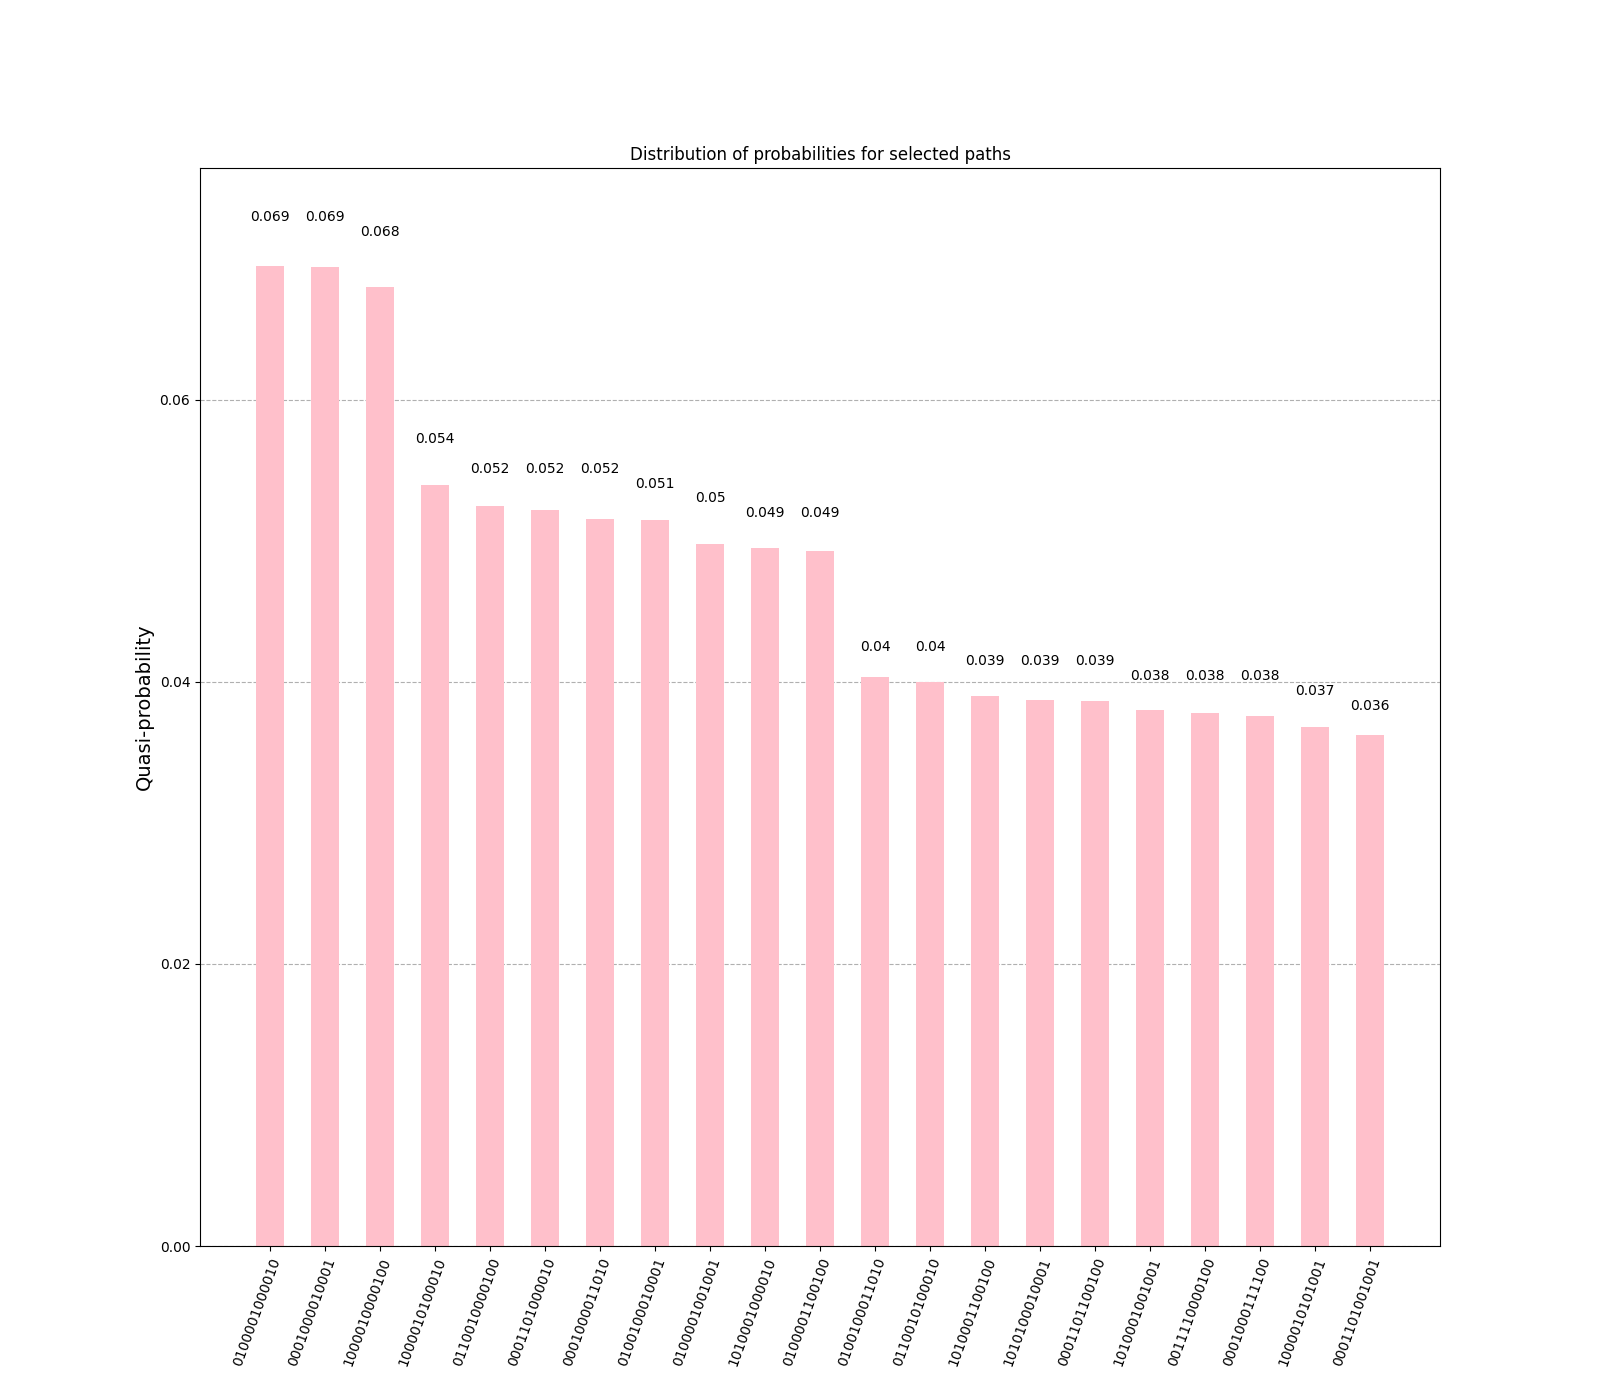

In [3]:
from IPython.display import Image, display  # type: ignore
!python 4_plot_distribution_probabilities.py  qaoa_solver_infos_alpha_1.5.npz  visu_total_dist visu_selected_dist edge
display(Image(filename='visu_selected_dist_0.png'))
# display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

### Visualiser les chemins optimaux:

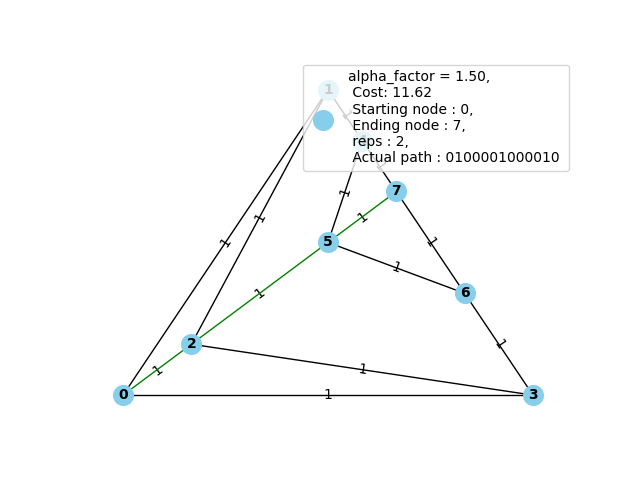

In [4]:
!python 5_plot_optimal_paths.py 13_edges_rand_graph  qaoa_solver_infos_alpha_1.5.npz opt_paths edge

display(Image(filename='opt_paths_0_alpha_1.50.png'))


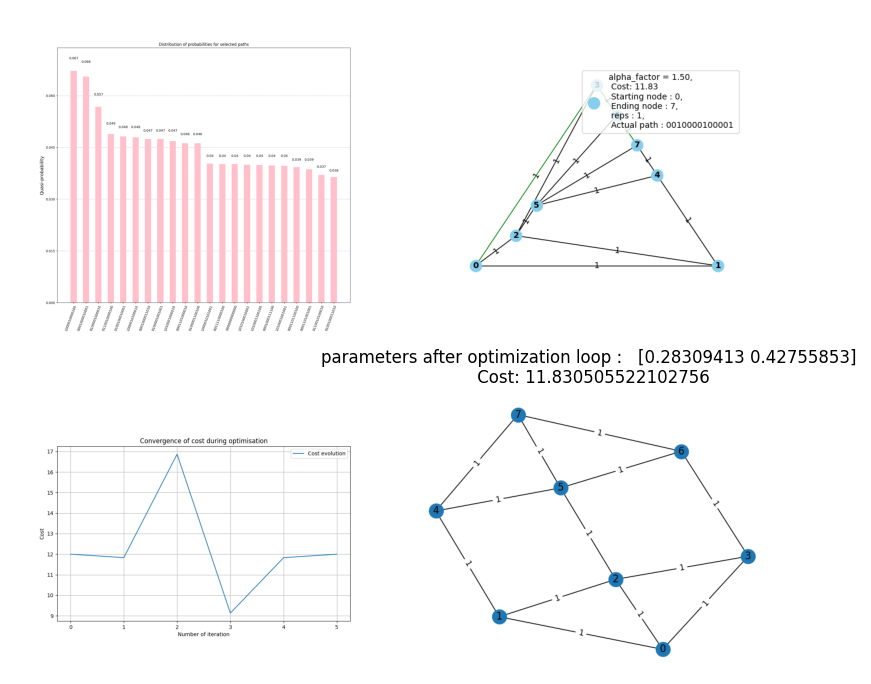

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement des quatre images
image1 = mpimg.imread("visu_selected_dist_0.png")
image2 = mpimg.imread("opt_paths_0_alpha_1.50.png")
image3 = mpimg.imread("cost_history_plot.png")
image4 = mpimg.imread("13_rand_graph_visu.png")

# Création de la figure et des sous-graphiques 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Ajout des images dans la grille
axs[0, 0].imshow(image1)
axs[0, 0].axis("off")  # Masquer les axes

axs[0, 1].imshow(image2)
axs[0, 1].axis("off")

axs[1, 0].imshow(image3)
axs[1, 0].axis("off")

axs[1, 1].imshow(image4)
axs[1, 1].axis("off")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.title('parameters after optimization loop :   [0.28309413 0.42755853] \n Cost: 11.830505522102756')
# Sauvegarde de l'image combinée
# plt.savefig("res_for_5.png", bbox_inches="tight", pad_inches=0.1)
plt.savefig("13edges_opt_loop_1rep_Powell.png", dpi=500, bbox_inches="tight", pad_inches=0.1)
plt.show()
